In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.statespace import exponential_smoothing
from statsmodels.tsa.seasonal import MSTL
from statsmodels.tsa.api import STLForecast


In [2]:
from utils import *

In [3]:
data = Data()

In [4]:
models = ["autoarima", "prophet", "tbats"]
forecast_path = "forecast_pickles/"
most_recent_pickles = {model: get_most_recent_pickle_that_starts_with(model, forecast_path) for model in models }

In [5]:
most_recent_pickles

{'autoarima': 'autoarima_forecast.pkl',
 'prophet': 'prophet_20231221143618.pkl',
 'tbats': 'tbats_20231221153519.pkl'}

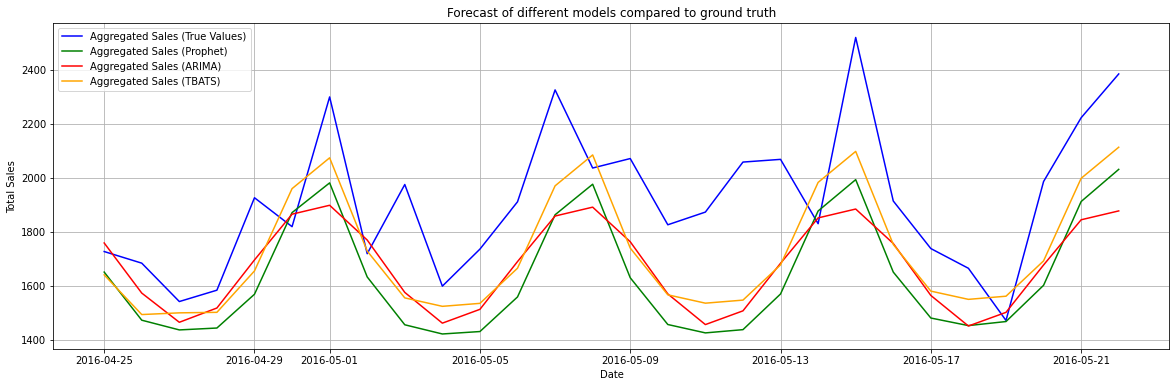

In [6]:
# Function to load the forecast from a pickle file
def load_forecast(model, forecast_path):
    filename = most_recent_pickles[model]
    pickle_file = f"{forecast_path}/{filename}"
    with open(pickle_file, 'rb') as f:
        forecast = pickle.load(f)
    return forecast

# Load forecasts for each model
prophet_forecast = load_forecast("prophet", forecast_path)
autoarima_forecast = load_forecast("autoarima", forecast_path)
tbats_forecast = load_forecast("tbats", forecast_path)
# Load other forecasts as needed

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(data.daily_sales_test.index, data.daily_sales_test.values, label='Aggregated Sales (True Values)', color='blue')
plt.plot(data.daily_sales_test.index, prophet_forecast['yhat'][1913:], label='Aggregated Sales (Prophet)', color='green')
plt.plot(data.daily_sales_test.index, autoarima_forecast.values, label='Aggregated Sales (ARIMA)', color='red')
plt.plot(data.daily_sales_test.index, tbats_forecast, label='Aggregated Sales (TBATS)', color='orange')
# Add plots for other forecasts as needed
plt.title('Forecast of different models compared to ground truth')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
rmse_prophet = np.sqrt(mean_squared_error(data.daily_sales_test.values, prophet_forecast['yhat'][1913:]))
print(f"RMSE for Prophet: {rmse_prophet}")

rmse_autoarima = np.sqrt(mean_squared_error(data.daily_sales_test.values, autoarima_forecast.values))
print(f"RMSE for AutoARIMA: {rmse_autoarima}")

rmse_tbats = np.sqrt(mean_squared_error(data.daily_sales_test.values, tbats_forecast))
print(f"RMSE for TBATS: {rmse_tbats}")



RMSE for Prophet: 329.7369622679785
RMSE for AutoARIMA: 301.22886889577404
RMSE for TBATS: 253.0557742135948


In [9]:
# Assuming data.daily_sales_test.values contain the true values

# Compute MPE for Prophet
mpe_prophet = np.mean((data.daily_sales_test.values - prophet_forecast['yhat'][1913:] ) / data.daily_sales_test.values * 100)
print(f"MPE for Prophet: {mpe_prophet}")

# Compute MPE for AutoARIMA
mpe_autoarima = np.mean((data.daily_sales_test.values -  autoarima_forecast.values) /data.daily_sales_test.values * 100)
print(f"MPE for AutoARIMA: {mpe_autoarima}")

# Compute MPE for TBATS
mpe_tbats = np.mean((data.daily_sales_test.values - tbats_forecast) /data.daily_sales_test.values * 100 )
print(f"MPE for TBATS: {mpe_tbats}")

# Add MPE computation for other forecasts as needed


MPE for Prophet: 13.955688375554058
MPE for AutoARIMA: 11.477847113498472
MPE for TBATS: 9.20400413501172
